5 a 23 microgramas por decilitro (mcg/dL) pela manhã e entre 3 a 16 mcg/dL à noite
- Fazer com que os gráficos não gerem picos tão gritantes;

In [2]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost", 
  user="urubu100",
  password="urubu100",
  database="cortisol"
)
cursor = mydb.cursor()
print(mydb)


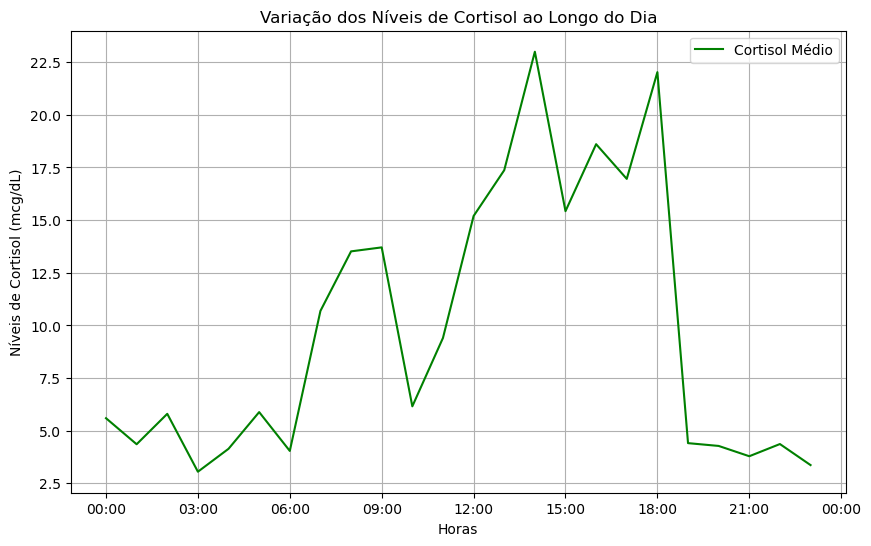

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import random

def gerar_dados(qtd_pessoas):
    for pessoa in range(qtd_pessoas):
        horas = list(range(24))
        cortisol_medio = []
        for hora in horas:
            if hora <= 6 or hora >= 19:  # Noite
                cortisol = random.uniform(3, 6)
            else:  # Dia
                if(hora == 14 or hora == 16 or hora == 18):
                    cortisol = random.uniform(18, 23)
                else:
                    cortisol = random.uniform(6, 18)
            cortisol_medio.append(cortisol)

            data_hora = datetime(2024, 1, 1, hora, 0)  
            # Convertendo as horas para o formato de data/hora
            horas_formatadas = [datetime(2024, 1, 1, hora, 0) for hora in horas]

            # sql = "INSERT INTO dados_cortisol (dado_cortisol, data_horario, id_pessoa) VALUES (%s, %s, %s)"
            # valores = (cortisol, data_hora, pessoa+1)

            # cursor.execute(sql, valores)

        # mydb.commit()
        # cursor.close()
        # mydb.close()

        plt.figure(figsize=(10, 6))
        plt.plot(horas_formatadas, cortisol_medio, label='Cortisol Médio', color='green')

        # Formatando o eixo x como horas
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

        plt.xlabel('Horas')
        plt.ylabel('Níveis de Cortisol (mcg/dL)')
        plt.title('Variação dos Níveis de Cortisol ao Longo do Dia')

        plt.legend()
        plt.grid(True)

        plt.show()


gerar_dados(1)


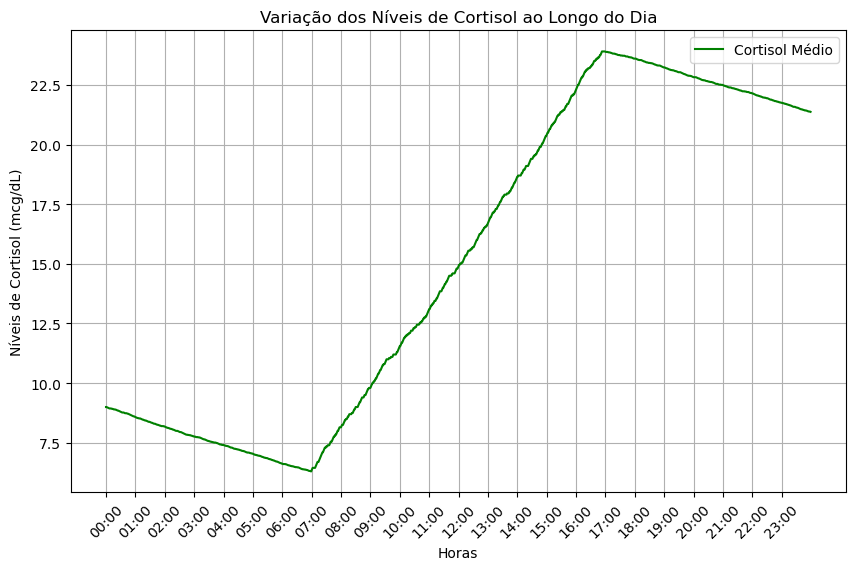

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import random
import numpy as np

def comportamentoNoturno(cortisol):
    i = random.random()
    if(i >= 0.6):
        return manter(cortisol)
    else:
        return diminuir(cortisol)
    
def comportamentoDiurno(cortisol):
    i = random.random()
    if(i >= 0.6):
        return manter(cortisol)
    else:
        return aumentar(cortisol)

def aumentar(cortisol):
    if(cortisol < 30):
        return cortisol + 0.05
    else:
        return cortisol

def diminuir(cortisol):
    if(cortisol >= 3):
        return cortisol - 0.01
    else:
        return cortisol

def manter(cortisol):
    return cortisol

def gerar_dados(qtd_pessoas):
    for pessoa in range(qtd_pessoas):
        cortisol = random.randint(3, 10)
        resultado = []
        for hora in range(24):
            for minuto in list(range(60)):
                if hora <= 6 or hora >= 17:  # Noite
                    cortisol = comportamentoNoturno(cortisol)
                else:  # Dia
                    cortisol = comportamentoDiurno(cortisol)
                
                resultado.append(cortisol)
                    
                data_hora = datetime(2024, 3, 1, hora, minuto)  
                # Convertendo as horas para o formato de data/hora
                horas_formatadas = np.arange(len(resultado))
                horas_labels = [f'{h:02}:00' for h in range(24)]

                # sql = "INSERT INTO dados_cortisol (dado_cortisol, data_horario, id_pessoa) VALUES (%s, %s, %s)"
                # valores = (cortisol, data_hora, pessoa+1)

                # cursor.execute(sql, valores)

        
        plt.figure(figsize=(10, 6))
        plt.plot(horas_formatadas, resultado, label='Cortisol Médio', color='green')

        # Formatando o eixo x como horas
        plt.xticks(np.arange(0, len(horas_formatadas), 60), horas_labels, rotation=45)

        plt.xlabel('Horas')
        plt.ylabel('Níveis de Cortisol (mcg/dL)')
        plt.title('Variação dos Níveis de Cortisol ao Longo do Dia')

        plt.legend()
        plt.grid(True)

        plt.show()

    # mydb.commit()


    # cursor.close()
    # mydb.close()

gerar_dados(1)